In [1]:
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble, QuantumRegister, ClassicalRegister 
from qiskit.tools.monitor import job_monitor
import matplotlib as mpl
# import basic plot tools
from qiskit.visualization import plot_histogram, plot_bloch_multivector


In [8]:
# Initializing circuit

qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different registers

tele_circuit= QuantumCircuit(qr,crz,crx)


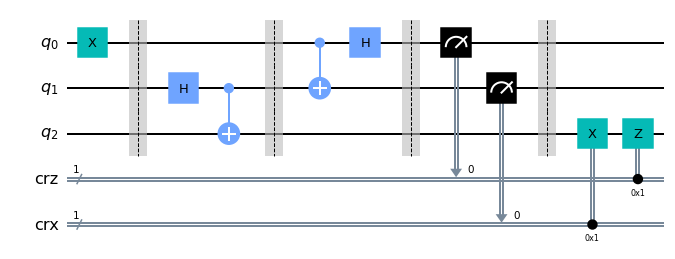

In [15]:
tele_circuit.clear()

# state to be teleported

tele_circuit.x(0)
tele_circuit.barrier()

# entaglement of alice qubits

tele_circuit.h(1)
tele_circuit.cx(1,2)
tele_circuit.barrier()

#entangling the bobs qubit

tele_circuit.cx(0,1)
tele_circuit.h(0)
tele_circuit.barrier()

tele_circuit.measure([0,1],[0,1])
tele_circuit.barrier()

def bob_gates(tele_circuit, qubit, crz, crx):

    tele_circuit.x(qubit).c_if(crx, 1)  
    tele_circuit.z(qubit).c_if(crz, 1) 
    
bob_gates(tele_circuit, 2, crz, crx)

tele_circuit.draw("mpl")

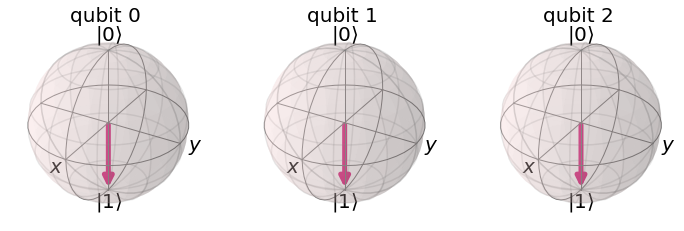

In [16]:
#running on ibm simulator

sim = Aer.get_backend('aer_simulator')
tele_circuit.save_statevector()
out_vector = sim.run(tele_circuit).result().get_statevector()
plot_bloch_multivector(out_vector)

**The state |psi> has been teleported from qubit 0 to qubit 2.**

In [29]:
#running on quantum computer
#signing in to ibm using api token

IBMQ.save_account('eb51948e03130da6b3212b337a0276eb3ddfb106e6e3ff49388aaf14efdded08d2624fa55f7d7158e02266b904d46424988e127c44056949754947d624319860')

configrc.store_credentials:WARNING:2023-02-16 23:11:32,725: Credentials already present. Set overwrite=True to overwrite.


In [33]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 2 and not b.configuration().simulator and b.status().operational==True))
print(backend)
t_qc = transpile(tele_circuit, backend, optimization_level=3)#transpile=assembling the circuit and everything
job = backend.run(t_qc)#backend means device
job_monitor(job)

ibmq_lima
Job Status: job has successfully run


In [31]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

{'000': 277, '001': 237, '010': 254, '011': 205, '100': 757, '101': 690, '110': 856, '111': 724}


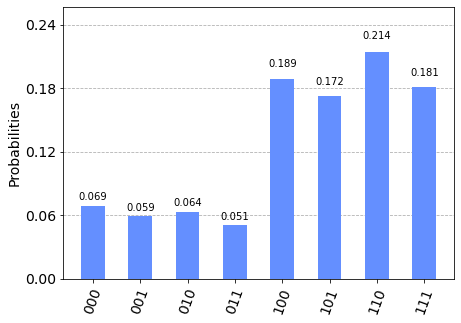

In [35]:
exp_result = job.result()
exp_counts = exp_result.get_counts(tele_circuit)
print(exp_counts)
plot_histogram(exp_counts)